In [4]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import librosa
import librosa.display
%matplotlib inline
from scipy.fft import fft, ifft
import IPython.display as ipd
from scipy import signal

In [5]:
# Utilizzare per il salvataggio in pgf da in inserire in latex
# quando attivo non permette la visualizzazione del plot su jupyter
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [56]:
ciaccona = "/Users/maurizioberta/Documents/Max 8/Packages/MuBu For Max/media/ciaccona.aiff"
guitar = "/Volumes/CrucialX8/Musica/Samples/Libraries/Orchidea/Guitar/ordinario/Gtr-ord-A#2-ff-5c-T11d.wav"

ciaccon_data, sr = librosa.load(ciaccona)
guitar_data, sr = librosa.load(guitar)

# Capitolo 2 Frequenza

### 2.1 Frequenza e unità di misura

Abbiamo:
- frequenza = f
- ∆t = periodo -> tempo (secondi,ore etc..)

In [44]:
def calculate_frequency(period):
    frequency = 1 / period
    return str(frequency) +  " Hz"

def calculate_period(frequency):
    period = 1 / frequency
    return str(period) + " Seconds"

In [45]:
frequency = 440
calculate_period(frequency)

'0.0022727272727272726 Seconds'

In [46]:
period = 0.0022727272727272726
calculate_frequency(period)


'440.0 Hz'

### 2.2 Seni e Coseni

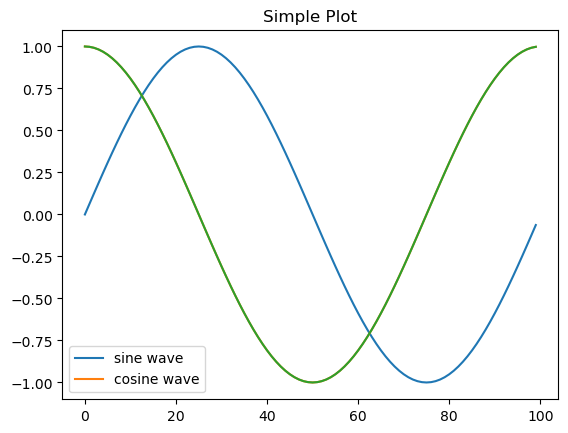

In [30]:
import math
y = librosa.tone(1, duration= 1, sr = 100)
plt.clf()

# def sine(length):
#     ##però voglio tenere conto della frequenza di campionamento
#     wave = []
#     for i in range(length):
#         y = math.sin(i)
#         wave.append(y)
#     return wave
    
#def cosine():

plt.plot(y, label='sine wave')

y = librosa.tone(1, duration= 1, phi= 0, sr = 100)

plt.plot(y, label='cosine wave')


plt.plot(y)

# plt.xlabel('x label')
# plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

Text(0.05, 0.05, 'a polar annotation')

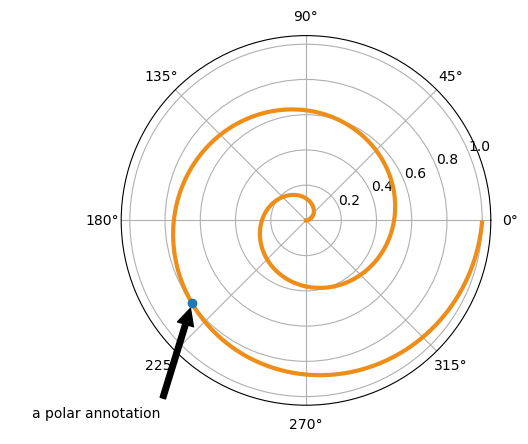

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
r = np.arange(0, 1, 0.001)
theta = 2 * 2*np.pi * r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')

### 2.5 Segnali periodici, puri e composti

ENOUGH!  11200


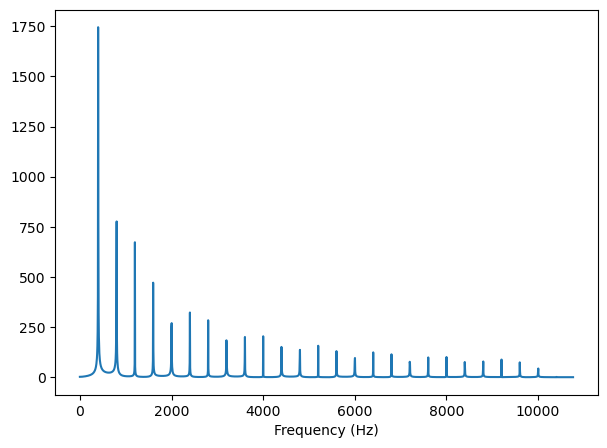

In [54]:
y = librosa.tone(440, duration= 1)
sr = 22050
# a frequenza di campionamento n quanti campioni mi servono per plottare ...
# ciclo for per costruire square wave

def sawtooth(nr_tones, frequency):
    y = 0;
    for i in range(nr_tones):
        #però solo numeri dispari
        current_freq = frequency * (i+1)
        if current_freq < sr/2:
            value = librosa.tone(current_freq, duration= 1) / (i+1)
            y = y + value #librosa.tone(2 * (i+1), duration= 1) / (i+1)
        else: 
            print("ENOUGH! ", current_freq)
            return y
    return y


sos = signal.butter(8, 10000, 'lp', fs=22050, output='sos')
x = (sawtooth(200, 400))
x = signal.sosfilt(sos, x)

X = fft(x[10000:14096])
X_mag = np.absolute(X)
f = np.linspace(0, sr, 4096)  # frequency variable
plt.figure(figsize=(7, 5))
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
#plt.title('Sawtooth Waveform Spectrum Representation')

ipd.Audio(x, rate=sr)
#plt.savefig("../figures/spettro_dente_di_sega.pgf")

In [60]:
def plot_sonogram(axis, ax_number, file_analyze, title):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(file_analyze)), ref=np.max)

    img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=axis[ax_number])

    #axis[ax_number].set(title=title)

    axis[ax_number].label_outer()

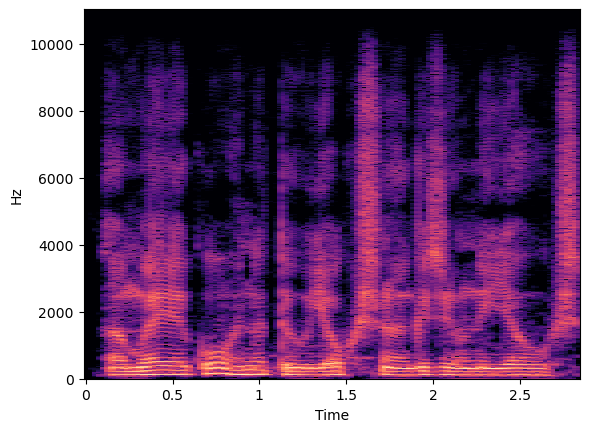

In [75]:
fig, ax = plt.subplots()
D = librosa.amplitude_to_db(np.abs(librosa.stft(z)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax)
#ax.label_outer()
#plt.savefig("../figures/cherooke.png")

<Figure size 640x480 with 0 Axes>

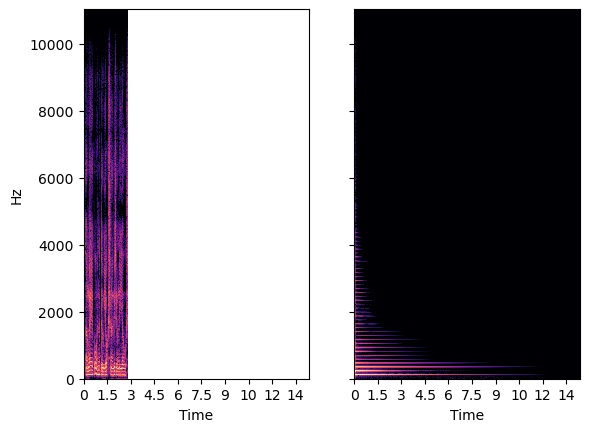

In [67]:
plt.clf()
fig, axis = plt.subplots(nrows=1, ncols=2, sharex=True)

# sos = signal.butter(24, 10000, 'lp', fs=22050, output='sos')
# x = (sawtooth(30, 320))
# x = signal.sosfilt(sos, x)
z, sr = librosa.load("/Applications/Max.app/Contents/Resources/C74/media/msp/cherokee.aif")
plot_sonogram(axis, 0, z , "")
plot_sonogram(axis, 1, guitar_data , "")
#plot_sonogram(axis, 1, x)    
#lt.savefig("../figures/nota_chitarra.pgf")

<Figure size 640x480 with 0 Axes>

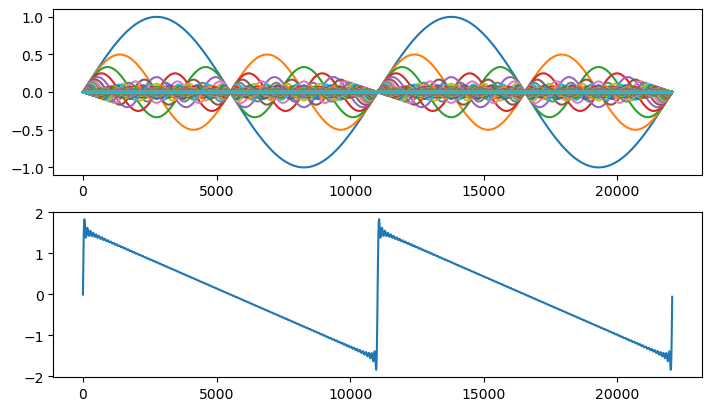

In [51]:
plt.clf()
fig, ax = plt.subplots(2, 1, figsize=(7, 4), layout='constrained')
# a frequenza di campionamento n quanti campioni mi servono per plottare ...
# ciclo for per costruire square wave

def sawtooth_plot(nr_tones, freq, sr = 22050):
    y = 0;
    for i in range(nr_tones):
        #però solo numeri dispari
        current_freq = freq * (i+1)
        if current_freq < sr/2 :
            value = librosa.tone(current_freq, duration= 1, sr = sr) / (i+1)
            y = y + value #librosa.tone(2 * (i+1), duration= 1) / (i+1)
            ax[0].plot(value)    
        else:
            print("ATTENZIONE NYQUIST: ", current_freq)
            ax[1].plot(y)
            return y
    ax[1].plot(y)
    return y

def square_plot(nr_tones, freq, sr = 22050):
    y = 0;

    for i in range(nr_tones):
        #però solo numeri dispari noo 
        
        if i%2 != 0:
            current_freq = freq * (i)
            if current_freq < sr/2 :
                value = librosa.tone(current_freq, duration= 1, sr= sr) / (i)
                y = y + value #librosa.tone(2 * (i), duration= 1) / (i)
                ax[0].plot(value)
            else:
                print("ATTENZIONE NYQUIST: ", current_freq)
                ax[1].plot(y)
                return y
    ax[1].plot(y)
    return y

def triangle_plot(nr_tones, freq, sr = 22050):
    y = 0;
    #plt.title("Onda Triangolare")
    for i in range(nr_tones):
        #come switcho la fase
        phase = 0;
        if i%2 != 0:
            current_freq = freq * (i)
            if current_freq < sr/2:    
                if phase == 0:
                    phase = np.pi;
                elif phase == np.pi:
                    phase = 0;
                value = librosa.tone(current_freq, duration= 1, phi = phase, sr=sr) / (i**2)
                ax[0].plot(value)
                y = y + value#librosa.tone(2 * (i), duration= 1, phi = phase) / (i**2) 
                #print(i**2
            else:
                print("ATTENZIONE NYQUIST: ", current_freq)
                ax[1].plot(y)
                return y
    ax[1].plot(y)
    return y

#square_plot(100, 2)
#triangle_plot(100,2)
sawtooth_plot(100, 2)
#plt.plot(triangle(10))
plt.savefig("../figures/dente_di_sega.pgf")

Una componente 100 Hz, una a 212 Hz e una a 213.5 Hz

Exception ignored in: <function Wave_write.__del__ at 0x14f366670>
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/label-studio/lib/python3.9/wave.py", line 326, in __del__
    self.close()
  File "/opt/homebrew/Caskroom/miniconda/base/envs/label-studio/lib/python3.9/wave.py", line 444, in close
    self._ensure_header_written(0)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/label-studio/lib/python3.9/wave.py", line 466, in _ensure_header_written
    raise Error('sampling rate not specified')
wave.Error: sampling rate not specified


<Figure size 640x480 with 0 Axes>

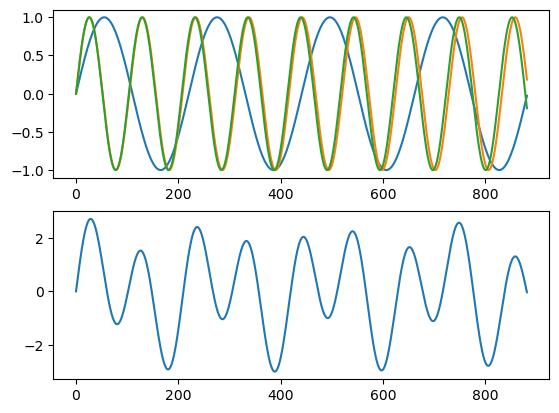

In [132]:
plt.clf()
fig, ax = plt.subplots(2, 1)
lunghezza = 0.04
freq1 = librosa.tone(100, duration = lunghezza)
freq2 = librosa.tone(212, duration = lunghezza)
freq3 = librosa.tone(213.5, duration = lunghezza)
y = freq1 +freq2 +freq3

ax[0].plot(freq1, label='100 Hz')

ax[0].plot(freq2, label ='212 Hz')
ax[0].plot(freq3, label= '213.5 Hz')
ax[1].plot(y)
ipd.Audio(y, rate=22050)
plt.savefig("../figures/onda_inarmonica.pgf")

### 2.6 Categorie di spettri

<Figure size 640x480 with 0 Axes>

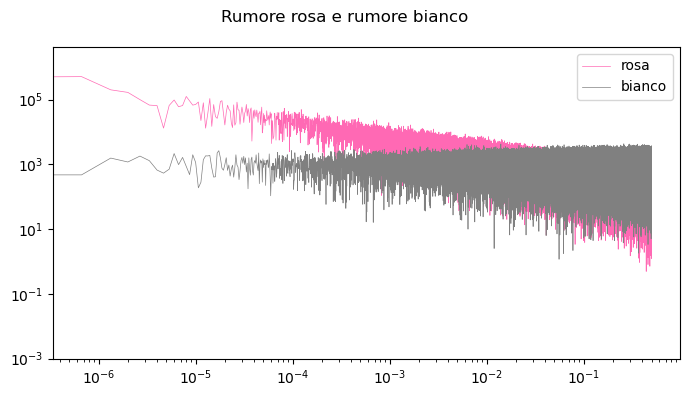

In [84]:
# plotting del rumore  bianco e rosa
plt.clf()

def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    return plt.loglog(f, np.abs(np.fft.rfft(s)))[0]

def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N));
        S = psd(np.fft.rfftfreq(N))
        # Normalize S
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S;
        return np.fft.irfft(X_shaped);

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

# @PSDGenerator
# def blue_noise(f):
#     return np.sqrt(f);

# @PSDGenerator
# def violet_noise(f):
#     return f;

# @PSDGenerator
# def brownian_noise(f):
#     return 1/np.where(f == 0, float('inf'), f)

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))


# for G, c in zip(
#         [brownian_noise, pink_noise, white_noise, blue_noise, violet_noise], 
#         ['brown', 'hotpink', 'yellow', 'blue', 'violet']):
#     plot_spectrum(G(30*50_000)).set(color=c, linewidth=0.5)
# plt.legend(['brownian', 'pink', 'white', 'blue', 'violet'])

#plt.style.use('dark_background')
plt.figure(figsize=(7, 4), tight_layout=True)
for G, c in zip(
        [pink_noise, white_noise], 
        ['hotpink', 'gray']):
    plot_spectrum(G(30*50_000)).set(color=c, linewidth=0.5)
plt.legend(['rosa', 'bianco'])
plt.suptitle("Rumore rosa e rumore bianco");
plt.ylim([1e-3, None]);

plt.savefig("../figures/rumori_vari.pgf")

- spettri armonici, inarmonici (mancano le formule delle sommatorie)

# Correzioni:

Riga 39 viene dato per scontato il concetto di trasformata di fourier e scomposizione del suono in sinusoidi.